In [115]:
library(tidyverse)
library(tidymodels)
set.seed(777)

We need to first read the dataset from the internet. After reading the data, we can rename the columns to make the data more informative. This is done below

In [116]:

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland_data <- read_csv(url, col_names = FALSE)
cleveland_data <- rename(cleveland_data,
       age = X1, 
       sex = X2, 
       cp = X3,
       trestbps = X4, 
       chol = X5, 
       fbs = X6, 
       restecg = X7, 
       thalach = X8, 
       exang = X9, 
       oldpeak = X10, 
       slope = X11, 
       ca = X12, 
       thal = X13, 
       num = X14)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The data is then mutated to convert the columns into the right variable type. For example, since cp(chest pain) is a factor, we can use the as_factor function to convert the column.

In [117]:
 cd_mutate <- cleveland_data |>
mutate(sex = as_factor(sex)) |> 
mutate(cp = as_factor(cp)) |> 
mutate(fbs = as_factor(fbs)) |> 
mutate(restecg = as_factor(restecg)) |> 
mutate(exang = as_factor(exang)) |> 
mutate(slope = as_factor(slope)) |> 
mutate(ca = as_factor(ca)) |>
mutate(thal = as_factor(thal)) |> 
mutate(num = as_factor(num))


The dataset for heart disease contains "?" instead of NA values which might be difficult to deal with later on. We can replace all the "?" to NA as shown below.

In [118]:
cd_mutate[cd_mutate == "?"] <- NA
cd_mutate

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


For this model, we will be using the variables age, sex, chol, restecg, trestbps to predict the cp type. Hence, we should select these columns from the dataset. 

In [119]:
cd_select<-select(cd_mutate, age, sex, chol, restecg,  trestbps, cp)

We have cleaned and wrangled the data to give a tidy data frame. We can now proceed to split the data into training and testing sets to conduct exploratory data analysis.

In [120]:

cd_split<-initial_split(cd_select, prop=0.75, strata=cp)
cd_training<-training(cd_split)
cd_test<-testing(cd_split)


We can now calculate the mean for the variables that are not a factor, namely age, trestbps, and chol. The following means are depicted in the table as shown below.

In [121]:
cd_means<-cd_training|>
    summarize(mean_age = mean(age),
            mean_trestbps = mean(trestbps),
              mean_chol = mean(chol))
cd_means            

mean_age,mean_trestbps,mean_chol
<dbl>,<dbl>,<dbl>
54.50885,132.031,248.2345


As seen from the table, the average age of 54.5 is quite high. With age, the heart condition deteriorates and may lead to complications. This indicates that the dataset should have high variability.

For the remaining columns which are factors, we can use a plot to visualize the frequencies for each occurence. First, we use the table() function to get a table with the correct counts and then use the as.data.frame function to convert it into a data frame.

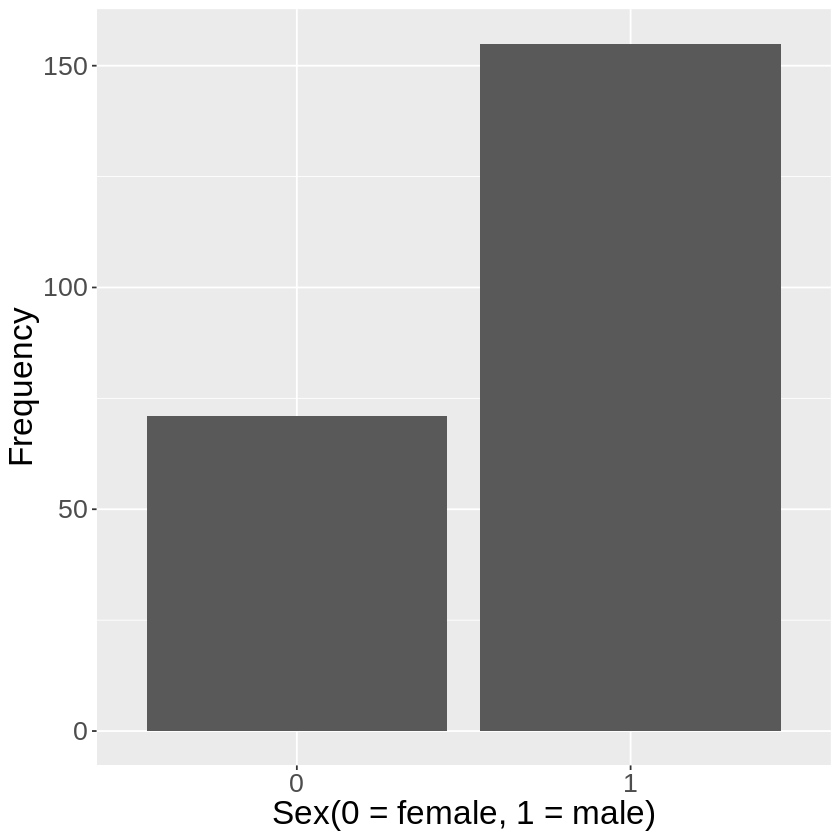

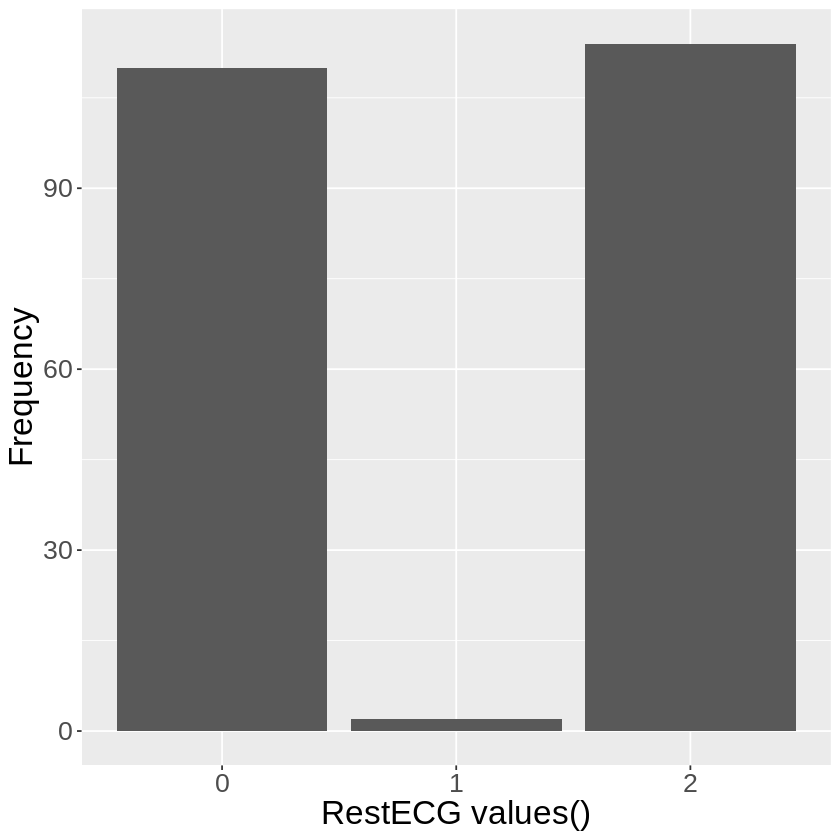

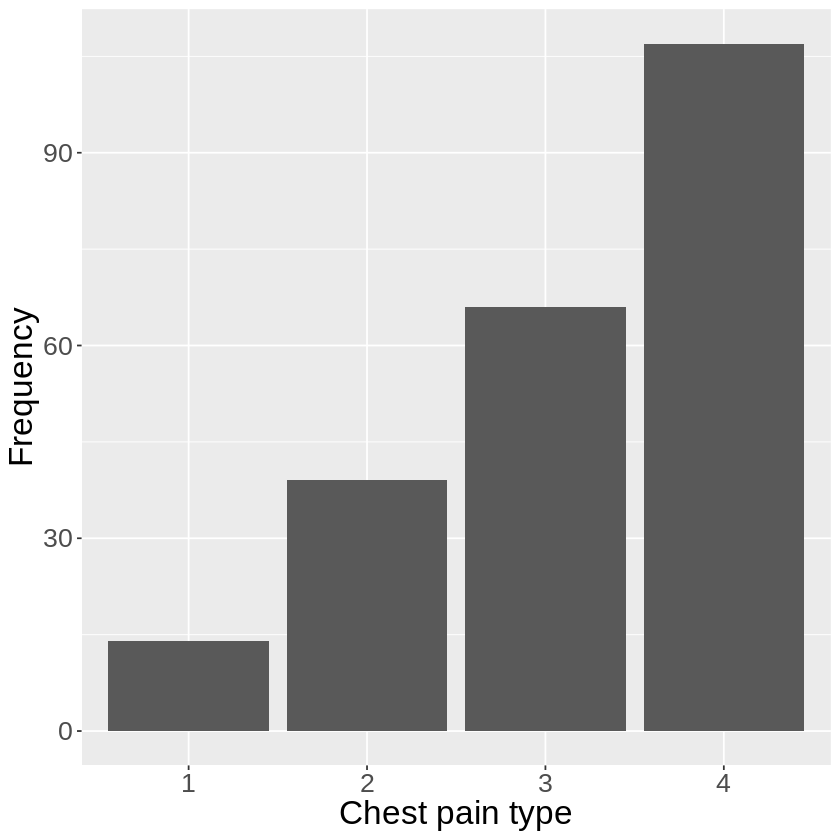

In [139]:
cd_training_sex <- as.data.frame(table(cd_training$sex))
cd_training_restecg <- as.data.frame(table(cd_training$restecg)) 
cd_training_cp <- as.data.frame(table(cd_training$cp))

cd_training_plot_sex <- ggplot(cd_training_sex, aes(x = Var1, y = Freq))+
                        geom_bar(stat = "identity") +
                        labs(x = "Sex(0 = female, 1 = male)", y = "Frequency") +
                        theme(text = element_text(size = 20))
cd_training_plot_restecg <- ggplot(cd_training_restecg, aes(x = Var1, y = Freq))+
                        geom_bar(stat = "identity") +
                        labs(x = "RestECG values()", y = "Frequency") +
                        theme(text = element_text(size = 20))
cd_training_plot_cp <- ggplot(cd_training_cp, aes(x = Var1, y = Freq))+
                        geom_bar(stat = "identity") +
                        labs(x = "Chest pain type", y = "Frequency") +
                        theme(text = element_text(size = 20))
cd_training_plot_sex
cd_training_plot_restecg
cd_training_plot_cp
